# Title

## Introduction

!!! INTRO

### Required packages

### uncomment and run below if altair not installed

In [2]:
# import sys
# !{sys.executable} -m pip install altair

In [3]:
!pip install pmdarima

  Using cached pmdarima-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.8 MB)


In [54]:
import pandas as pd
import numpy as np
import altair as alt
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import datetime as dt
# from datetime import datetime    
# sns.set_style("whitegrid")
# from pandas.plotting import autocorrelation_plot
# plt.style.use("ggplot")
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf as acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
# from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

### Loading required dataset

In [5]:
# Amazon
amzn = pd.read_csv('data/AMZN.csv').iloc[3684:]
# Apple
aapl = pd.read_csv('data/AAPL.csv').iloc[7836:]
# Microsft
msft = pd.read_csv('data/MSFT.csv').iloc[6510:]

## Exploratory Data Analysis

In [62]:
amzn.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
3684,2012-04-01,8.8035,8.9605,84104000,9.0250,8.8755,8.8755
3685,2012-05-01,8.7025,8.7970,76182000,8.9125,8.8805,8.8805
3686,2012-06-01,8.8750,8.9035,140168000,9.2325,9.1305,9.1305
3687,2012-09-01,8.8500,9.1380,101138000,9.2185,8.9280,8.9280
3688,2012-10-01,8.8550,9.0550,79716000,9.1200,8.9670,8.9670


In [109]:
aapl.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
7836,04-01-2012,14.617143,14.642857,260022000,14.810000,14.765714,12.586558
7837,05-01-2012,14.738214,14.819643,271269600,14.948214,14.929643,12.726295
7838,06-01-2012,14.972143,14.991786,318292800,15.098214,15.085714,12.859331
7839,09-01-2012,15.048214,15.196429,394024400,15.276786,15.061786,12.838937
7840,10-01-2012,15.053571,15.211071,258196400,15.214286,15.115714,12.884903


In [111]:
msft.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
6510,04-01-2012,26.780001,26.820000,80516100,27.469999,27.400000,22.260885
6511,05-01-2012,27.290001,27.379999,56081400,27.730000,27.680000,22.488358
6512,06-01-2012,27.530001,27.530001,99455500,28.190001,28.110001,22.837715
6513,09-01-2012,27.719999,28.049999,59706800,28.100000,27.740000,22.537107
6514,10-01-2012,27.750000,27.930000,60014400,28.150000,27.840000,22.618357


In [112]:
amzn.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,2754.000000,2754.000000,2.754000e+03,2754.000000,2754.000000,2754.000000
mean,67.219611,68.083358,8.059073e+07,68.857192,68.047067,68.047067
std,53.347081,54.083415,4.308913e+07,54.739446,54.028135,54.028135
min,8.600000,8.690500,1.762600e+07,8.912500,8.796500,8.796500
25%,17.680624,17.908501,5.372200e+07,18.051000,17.931125,17.931125
50%,47.968500,48.382999,6.908400e+07,48.722250,48.299250,48.299250
75%,97.639378,98.942877,9.337150e+07,99.983625,98.928751,98.928751
max,184.839493,187.199997,4.771220e+08,188.654007,186.570496,186.570496


In [9]:
aapl.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,2754.000000,2754.000000,2.754000e+03,2754.000000,2754.000000,2754.000000
mean,57.627950,58.264554,2.040507e+08,58.918758,58.297724,56.399681
std,47.177529,47.781699,1.720200e+08,48.409071,47.818842,48.393244
min,13.753571,13.856071,2.190492e+07,14.271429,13.947500,12.064583
25%,23.906876,24.123750,9.520310e+07,24.341874,24.150625,21.930494
50%,37.136251,37.431250,1.400772e+08,37.836250,37.516251,35.463987
75%,74.248751,75.055626,2.485546e+08,75.962500,75.140001,73.744028
max,179.119995,182.630005,1.506120e+09,182.940002,182.009995,180.959747


In [10]:
msft.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,2754.000000,2754.000000,2.754000e+03,2754.000000,2754.000000,2754.000000
mean,111.724274,112.894076,3.366026e+07,114.014362,112.927059,109.521020
std,88.385068,89.432785,1.747221e+07,90.408360,89.441145,91.242246
min,26.260000,26.379999,7.425600e+06,26.629999,26.370001,22.029959
25%,42.562499,42.927499,2.286070e+07,43.240002,43.045001,38.068505
50%,69.840000,70.470001,2.952465e+07,70.845001,70.294998,66.379726
75%,167.912498,171.007496,3.918062e+07,173.730000,170.470001,168.351524
max,342.200012,344.619995,2.484285e+08,349.670013,343.109985,343.109985


##### Checking null value

In [11]:
amzn.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [12]:
aapl.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [13]:
msft.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

There are no null values

In [14]:
# amazon average monthly open value list
amazon_monthly_open = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Open'].mean().reset_index()

amazon_monthly_open['Date'] = amazon_monthly_open['Date'].apply(lambda x: x.to_timestamp())

# apple average monthly open value list
apple_monthly_open = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Open'].mean().reset_index()

apple_monthly_open['Date'] = apple_monthly_open['Date'].apply(lambda x: x.to_timestamp())

# microsoft average monthly open value list
microsoft_monthly_open = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Open'].mean().reset_index()

microsoft_monthly_open['Date'] = microsoft_monthly_open['Date'].apply(lambda x: x.to_timestamp())

# create company comlumn that shows where the data is from
amazon_monthly_open['company']= 'amzn'
apple_monthly_open['company']= 'aapl'
microsoft_monthly_open['company']= 'msft'

opens = [amazon_monthly_open, apple_monthly_open, microsoft_monthly_open]

# concat all companes into one df
open_top3_nasdaq = pd.concat(opens)

open_top3_nasdaq.head()

/tmp/ipykernel_227/2226228315.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amazon_monthly_open = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Open'].mean().reset_index()
/tmp/ipykernel_227/2226228315.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  apple_monthly_open = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Open'].mean().reset_index()
/tmp/ipykernel_227/2226228315.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  microsoft_monthly_open = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Open'].mean().reset_index()


,Date,Open,company
0,2012-01-01,9.914868,amzn
1,2012-02-01,9.808325,amzn
2,2012-03-01,10.158310,amzn
3,2012-04-01,10.309158,amzn
4,2012-05-01,10.956250,amzn


In [15]:
# amazon average monthly closing value list
amazon_monthly_close = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Close'].mean().reset_index()

amazon_monthly_close['Date'] = amazon_monthly_close['Date'].apply(lambda x: x.to_timestamp())

# apple average monthly closing value list
apple_monthly_close = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Close'].mean().reset_index()

apple_monthly_close['Date'] = apple_monthly_close['Date'].apply(lambda x: x.to_timestamp())

# microsoft average monthly closing value list
microsoft_monthly_close = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Close'].mean().reset_index()

microsoft_monthly_close['Date'] = microsoft_monthly_close['Date'].apply(lambda x: x.to_timestamp())

# create company comlumn that shows where the data is from
amazon_monthly_close['company']= 'amzn'
apple_monthly_close['company']= 'aapl'
microsoft_monthly_close['company']= 'msft'

closings = [amazon_monthly_close, apple_monthly_close, microsoft_monthly_close]

# concat all companes into one df
close_top3_nasdaq = pd.concat(closings)

close_top3_nasdaq.head()

/tmp/ipykernel_227/954031980.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amazon_monthly_close = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Close'].mean().reset_index()
/tmp/ipykernel_227/954031980.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  apple_monthly_close = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Close'].mean().reset_index()
/tmp/ipykernel_227/954031980.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  microsoft_monthly_close = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Close'].mean().reset_index(

,Date,Close,company
0,2012-01-01,9.960711,amzn
1,2012-02-01,9.812850,amzn
2,2012-03-01,10.232095,amzn
3,2012-04-01,10.350342,amzn
4,2012-05-01,10.920182,amzn


In [16]:
# amazon average monthly volumn
amazon_monthly_volume = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Volume'].mean().reset_index()

amazon_monthly_volume['Date'] = amazon_monthly_volume['Date'].apply(lambda x: x.to_timestamp())

# apple average monthly volumn
apple_monthly_volume = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Volume'].mean().reset_index()

apple_monthly_volume['Date'] = apple_monthly_volume['Date'].apply(lambda x: x.to_timestamp())

# microsoft average monthly volumn
microsoft_monthly_volume = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Volume'].mean().reset_index()

microsoft_monthly_volume['Date'] = microsoft_monthly_volume['Date'].apply(lambda x: x.to_timestamp())

# create company comlumn that shows where the data is from
amazon_monthly_volume['company']= 'amzn'
apple_monthly_volume['company']= 'aapl'
microsoft_monthly_volume['company']= 'msft'

volume = [amazon_monthly_volume, apple_monthly_volume, microsoft_monthly_volume]

# concat all companes into one df
volume_top3_nasdaq = pd.concat(volume)

volume_top3_nasdaq.head()

/tmp/ipykernel_227/681992908.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amazon_monthly_volume = amzn.groupby(pd.PeriodIndex(amzn['Date'], freq="M"))['Volume'].mean().reset_index()
/tmp/ipykernel_227/681992908.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  apple_monthly_volume = aapl.groupby(pd.PeriodIndex(aapl['Date'], freq="M"))['Volume'].mean().reset_index()
/tmp/ipykernel_227/681992908.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  microsoft_monthly_volume = msft.groupby(pd.PeriodIndex(msft['Date'], freq="M"))['Volume'].mean().reset_

,Date,Volume,company
0,2012-01-01,1.251382e+08,amzn
1,2012-02-01,1.138773e+08,amzn
2,2012-03-01,9.989057e+07,amzn
3,2012-04-01,1.081960e+08,amzn
4,2012-05-01,7.317045e+07,amzn


### Plots

### Opening prices by companies

In [17]:
# selection interaction
nearest = alt.selection_single(nearest=True, on='mouseover')

# stock average monthly open value 
monthly_open_plt = alt.Chart(open_top3_nasdaq).mark_line(interpolate='basis').encode(
    alt.X('Date:T'),
    alt.Y('Open:Q', type='quantitative'),
    color='company:N'
)

# select chart
selectors = alt.Chart(open_top3_nasdaq).mark_point().encode(
    alt.X('Date:T'),
    opacity=alt.value(0),
).add_selection (
    nearest
)

# Draw points on the line, and highlight based on selection
points = monthly_open_plt.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = monthly_open_plt.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Open:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(open_top3_nasdaq).mark_rule(color='gray').encode(
    alt.X('Date:T'),
).transform_filter(
    nearest
)
                         
# 

# Put the five layers into a chart and bind the data
alt.layer(
    monthly_open_plt, selectors, points, rules, text
).properties(
    width=600
).interactive(
)

alt.LayerChart(...)

### Closing prices by companies

In [18]:
# selection interaction
nearest = alt.selection_single(nearest=True, on='mouseover')

# stock average monthly open value 
monthly_close_plt = alt.Chart(close_top3_nasdaq).mark_line(interpolate='basis').encode(
    alt.X('Date:T'),
    alt.Y('Close:Q', type='quantitative'),
    color='company:N'
)

# select chart
selectors = alt.Chart(close_top3_nasdaq).mark_point().encode(
    alt.X('Date:T'),
    opacity=alt.value(0),
).add_selection (
    nearest
)

# Draw points on the line, and highlight based on selection
points = monthly_close_plt.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = monthly_close_plt.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Close:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(close_top3_nasdaq).mark_rule(color='gray').encode(
    alt.X('Date:T'),
).transform_filter(
    nearest
)
                         
# 

# Put the five layers into a chart and bind the data
alt.layer(
    monthly_close_plt, selectors, points, rules, text
).properties(
    width=600
).interactive(
)

alt.LayerChart(...)

### Volumn prices by companies

In [19]:
# selection interaction
nearest = alt.selection_single(nearest=True, on='mouseover')

# stock average monthly open value 
monthly_volume_plt = alt.Chart(volume_top3_nasdaq).mark_line(interpolate='basis').encode(
    alt.X('Date:T'),
    alt.Y('Volume:Q', type='quantitative'),
    color='company:N'
)

# select chart
selectors = alt.Chart(volume_top3_nasdaq).mark_point().encode(
    alt.X('Date:T'),
    opacity=alt.value(0),
).add_selection (
    nearest
)

# point 
points = monthly_volume_plt.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# text
text = monthly_volume_plt.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Volume:Q', alt.value(' '))
)

# ruling
rules = alt.Chart(volume_top3_nasdaq).mark_rule(color='gray').encode(
    alt.X('Date:T'),
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    monthly_volume_plt, selectors, points, rules, text
).properties(
    width=600
).interactive(
)

alt.LayerChart(...)

Correlation graph

/tmp/ipykernel_227/1628456353.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amzn['Date'] = pd.to_datetime(amzn['Date'])


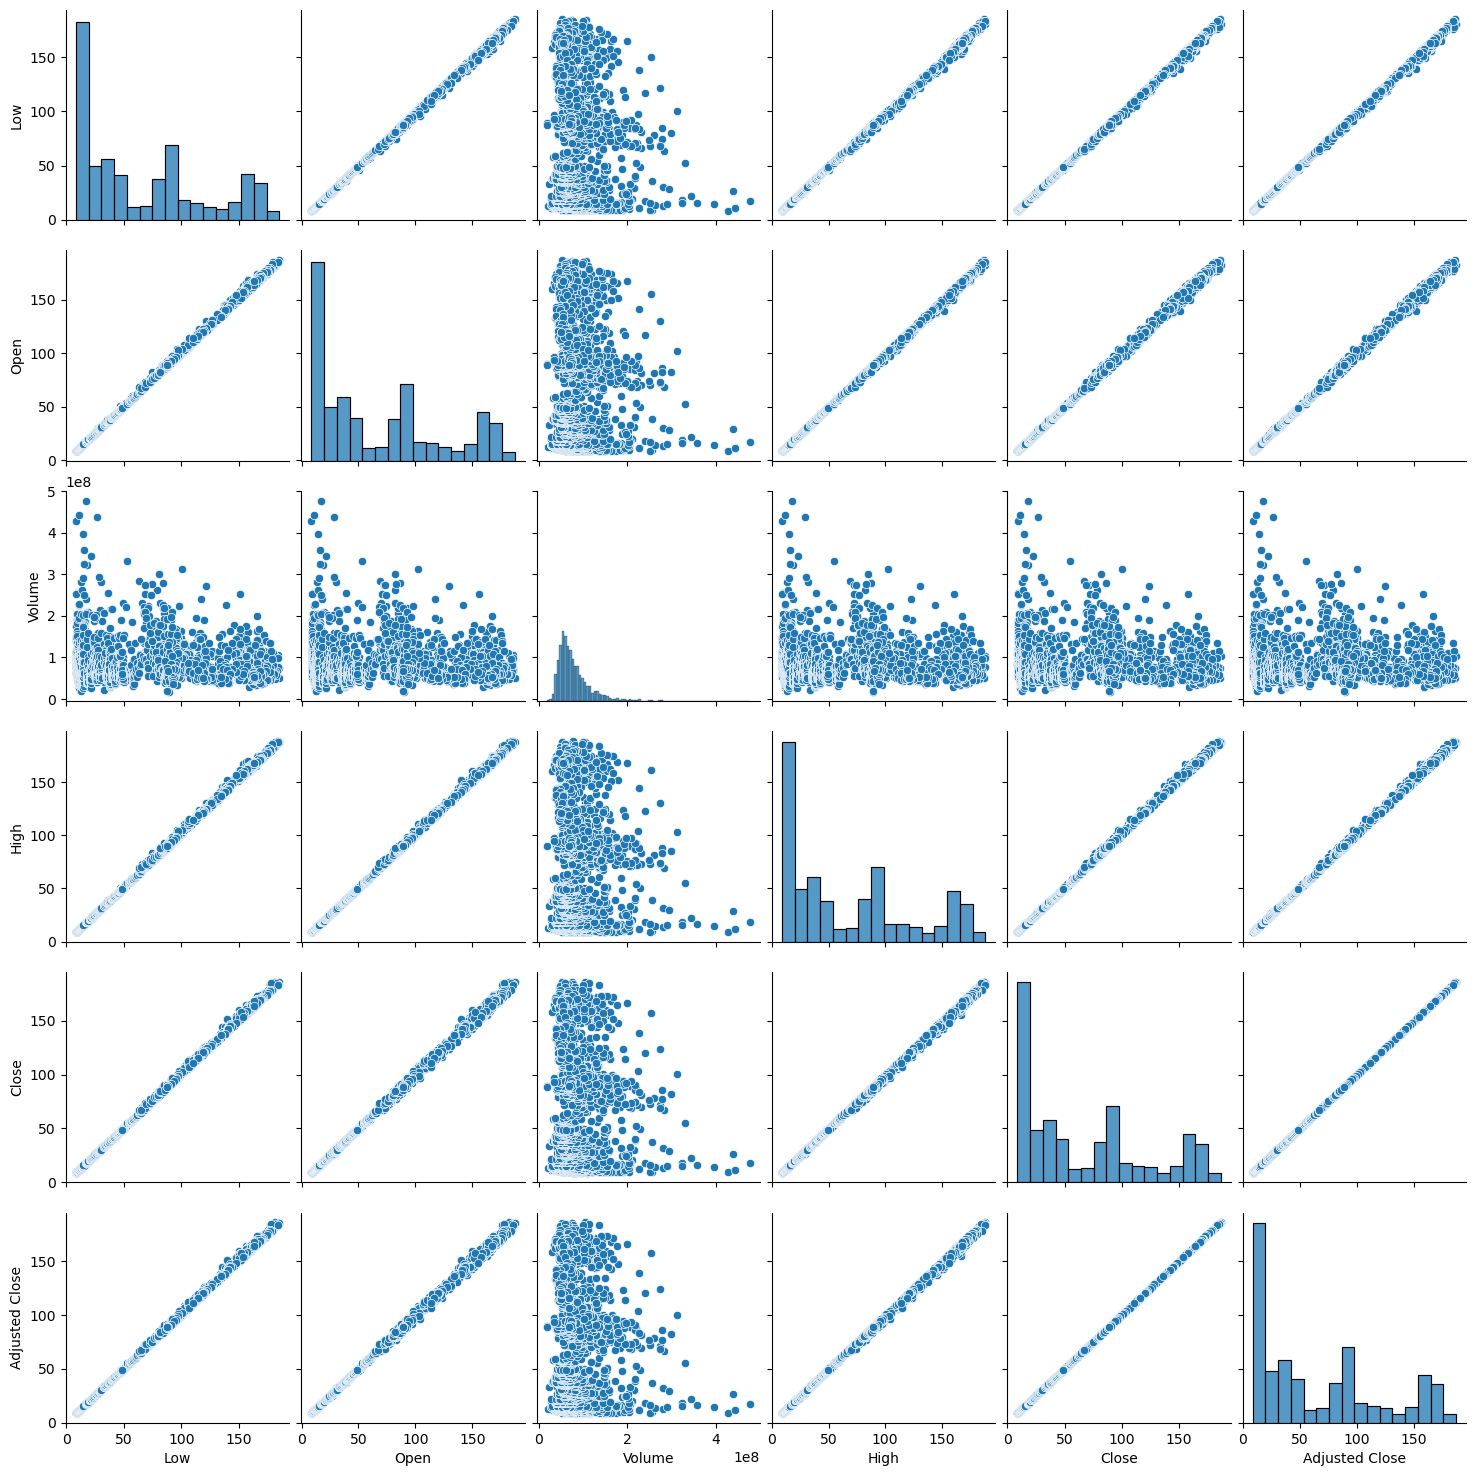

In [20]:
amzn['Date'] = pd.to_datetime(amzn['Date'])
sns.pairplot(amzn)
plt.show()

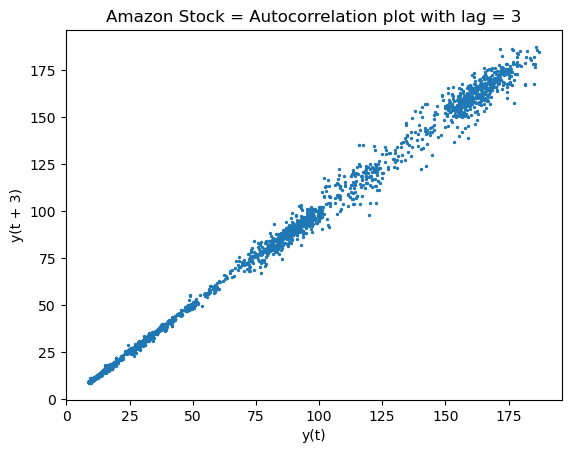

In [21]:
plt.figure()
lag_plot(amzn['Open'], lag=3, s = 2)
plt.title('Amazon Stock = Autocorrelation plot with lag = 3')
plt.show()

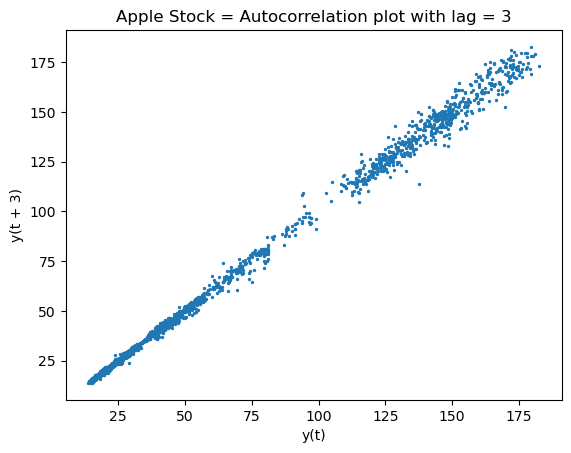

In [22]:
plt.figure()
lag_plot(aapl['Open'], lag=3, s = 2)
plt.title('Apple Stock = Autocorrelation plot with lag = 3')
plt.show()

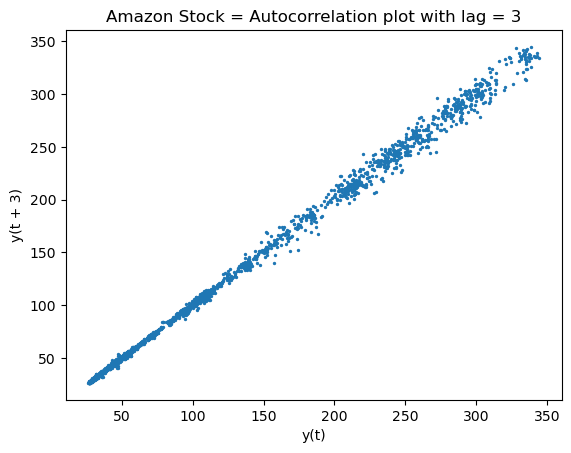

In [23]:
plt.figure()
lag_plot(msft['Open'], lag=3, s = 2)
plt.title('Amazon Stock = Autocorrelation plot with lag = 3')
plt.show()

##### Seeing the above lag plots show that there  is a linear pattern and ARIMA will be a suited model

In [263]:
# split train test 
amzn1 = pd.read_csv('data/AMZN.csv',index_col=0,parse_dates=[0]).iloc[3684:]
aapl1 = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=[0]).iloc[7836:]
msft1 = pd.read_csv('data/MSFT.csv',index_col=0,parse_dates=[0]).iloc[6510:]
amzn_week = amzn1['Close'].resample('W-MON').mean()
aapl_week = aapl1['Close'].resample('W-MON').mean()
msft_week = msft1['Close'].resample('W-MON').mean()

amzn_train=np.log(amzn_week['2012':'2021'])
amzn_test=np.log(amzn_week['2021':])

aapl_train=np.log(aapl_week['2012':'2021'])
aapl_test=np.log(aapl_week['2021':])

msft_train=np.log(msft_week['2012':'2021'])
msft_test=np.log(msft_week['2021':])


/tmp/ipykernel_227/3844375313.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  amzn1 = pd.read_csv('data/AMZN.csv',index_col=0,parse_dates=[0]).iloc[3684:]
/tmp/ipykernel_227/3844375313.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  aapl1 = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=[0]).iloc[7836:]
/tmp/ipykernel_227/3844375313.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  msft1 = pd.read_csv('data/MSFT.csv',index_col=0,parse_dates=[0]).iloc[6510:]


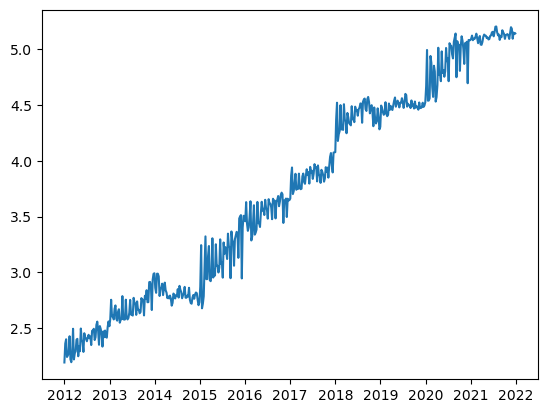

In [179]:
plt.plot(amzn_train)

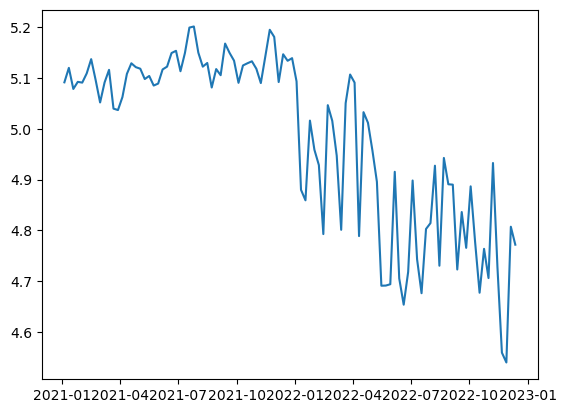

In [180]:
plt.plot(amzn_test)

In [181]:
result = adfuller(amzn_train)

if result[1] > 0.05:
    # non-stationary series, so differencing
    diff_series = amzn_train.diff().dropna()
else:
    diff_series = amzn_train

# Determine the order of differencing
result = kpss(diff_series)
if result[1] < 0.05:
    # The series needs to be differenced
    diff_series = diff_series.diff().dropna()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


train_data = [amzn_train, aapl_train, msft_train]

for t in train_data:
    result = adfuller(t)
    if result[1] > 0.01:
        # non-stationary series, so differencing
        diff_series = t.diff().dropna()
    else:
        diff_series = t

    # Determine the order of differencing
    result = kpss(diff_series)
    if result[1] < 0.01:
        # The series needs to be differenced
        diff_series = diff_series.diff().dropna()
    name = [key for key, value in locals().items() if value == t]
    print(name[0])
    plot_acf(diff_series)
    plt.show()
    plot_pacf(diff_series)
    plt.show()

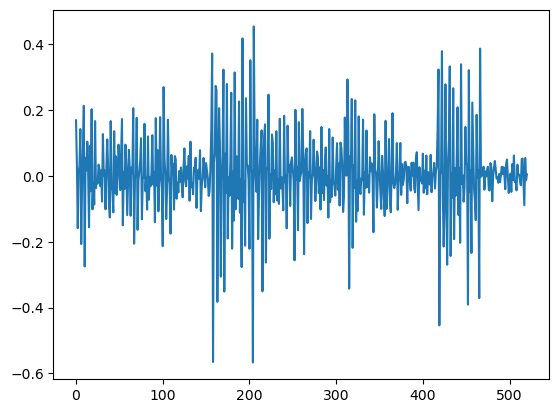

In [182]:
amzn_diff = np.diff(amzn_train)
plt.figure()
plt.plot(amzn_diff)
plt.show()

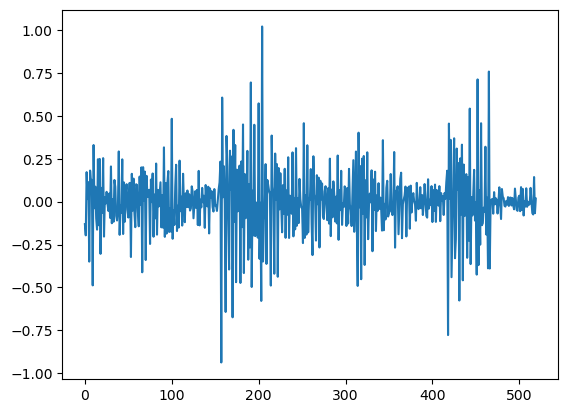

In [183]:
amzn_diff2 = np.diff(np.diff(amzn_train))
plt.figure()
plt.plot(amzn_diff2)
plt.show()

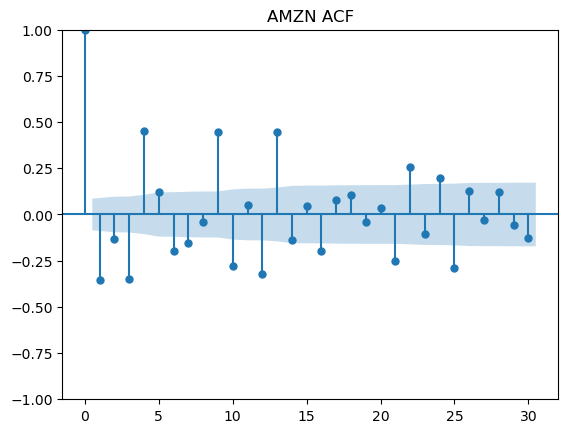

In [184]:
amzn_acf = plot_acf(amzn_diff, lags=30)
plt.title("AMZN ACF")
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


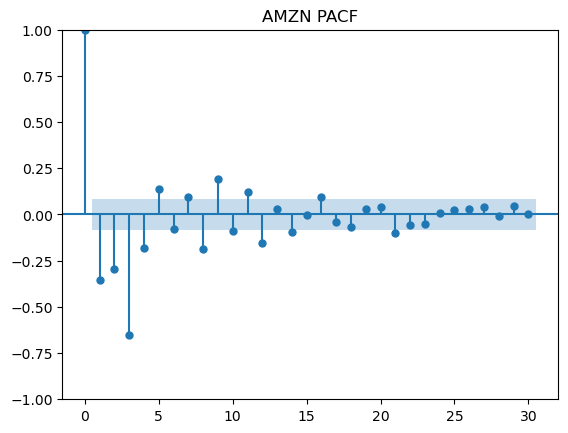

In [185]:
amzn_pacf = plot_pacf(amzn_diff, lags=30)
plt.title("AMZN PACF")
plt.show()

# assign as value as an array
amzn_train = amzn_train.values
amzn_test = amzn_test.values

aapl_train = aapl_train.values
aapl_test = aapl_test.values

msft_train = msft_train.values
msft_test = msft_test.values

In [201]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(amzn_diff2)

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

In [206]:
def ad_test(dataset):
    dftest=adfuller(dataset, autolag = 'AIC')
    print("P-value: ", dftest[1])

ad_test(amzn_diff2)
#plt.figure()
#plt.plot(amzn_week1)
#test_stationarity(amzn_week1)

P-value:  6.028969077536438e-17


##### Looking at above plots we chose p = 1 and q = 1

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-689.332, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-757.374, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-916.144, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-690.257, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-915.386, Time=1.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-916.433, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-915.635, Time=2.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-944.122, Time=2.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-945.625, Time=2.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1048.323, Time=3.90 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-995.036, Time=2.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1102.174, Time=3.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1101.840, Time=3.08 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-1084.993, Time=1.62 sec

Best model:  ARIMA(3,1,3)(0,

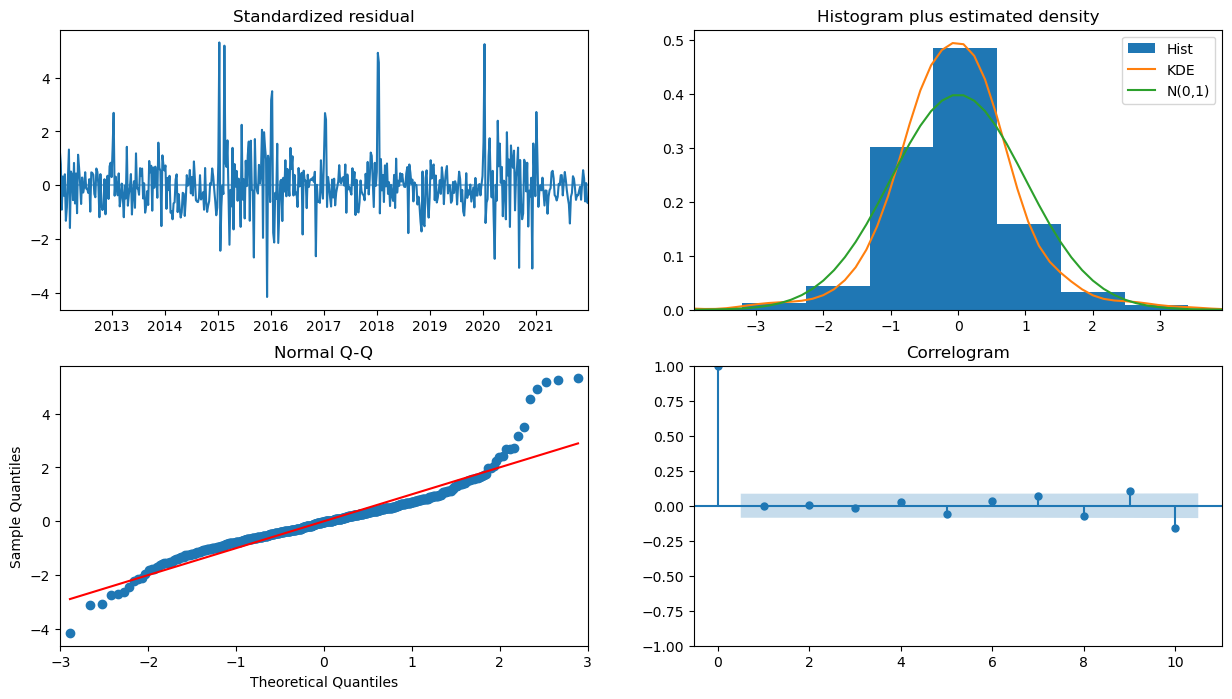

In [188]:
model_autoARIMA = auto_arima(amzn_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [215]:
amzn_model = ARIMA(amzn_train, order=(3,2,3),freq='W-MON')
amzn_fitted = amzn_model.fit()  
print(amzn_fitted.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  522
Model:                 ARIMA(3, 2, 3)   Log Likelihood                 551.489
Date:                Mon, 24 Apr 2023   AIC                          -1088.977
Time:                        08:13:06   BIC                          -1059.201
Sample:                    01-02-2012   HQIC                         -1077.313
                         - 12-27-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4841      0.043    -11.284      0.000      -0.568      -0.400
ar.L2         -0.6170      0.039    -15.930      0.000      -0.693      -0.541
ar.L3         -0.6353      0.034    -18.432      0.0

forecast=amzn_fitted.predict(n_periods=len(amzn_test))
#forecast=pd.DataFrame(forecast,index=amzn_test.index,columns=['Prediction'])
plt.plot(amzn_train,label='Train')
plt.plot(amzn_test,label='Test')
plt.plot(forecast,label='Prediction')
plt.show()

In [216]:
pred=amzn_fitted.predict('2019','2021',dynamic=True,typ='levels')
print(pred)

Date
2019-01-07    4.414275
2019-01-14    4.424133
2019-01-21    4.351870
2019-01-28    4.325311
2019-02-04    4.391852
                ...   
2021-11-29    5.211042
2021-12-06    5.216655
2021-12-13    5.222267
2021-12-20    5.227880
2021-12-27    5.233492
Freq: W-MON, Name: predicted_mean, Length: 156, dtype: float64


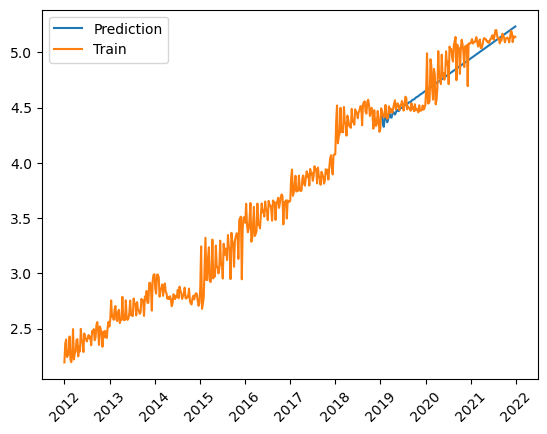

In [217]:
plt.xticks(rotation=45)
plt.plot(pred,label='Prediction')
plt.plot(amzn_train,label="Train")
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-816.546, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-874.012, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-997.285, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-817.649, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-845.640, Time=1.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1000.174, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-999.220, Time=1.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1023.858, Time=3.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1033.559, Time=2.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1107.763, Time=3.80 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1086.962, Time=2.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1196.542, Time=3.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1198.542, Time=2.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1187.300, Time=2.17 sec
 ARIMA(2,1,1)(0,0,0)[0] i

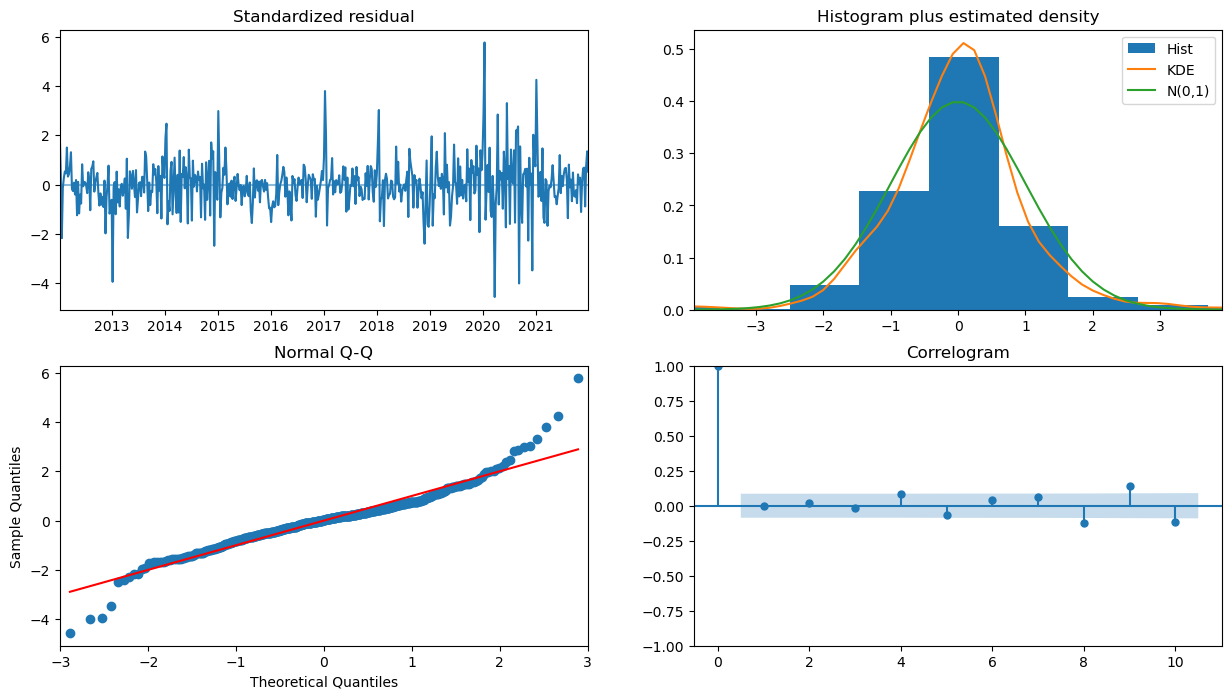

In [232]:
model_autoARIMA = auto_arima(aapl_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [251]:
aapl_model = ARIMA(aapl_train, order=(3,2,2),freq='W-MON')
aapl_fitted = aapl_model.fit()  
print(aapl_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  522
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 594.329
Date:                Mon, 24 Apr 2023   AIC                          -1176.657
Time:                        08:19:29   BIC                          -1151.134
Sample:                    01-02-2012   HQIC                         -1166.659
                         - 12-27-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6131      0.039    -15.717      0.000      -0.690      -0.537
ar.L2         -0.5804      0.037    -15.797      0.000      -0.652      -0.508
ar.L3         -0.6395      0.025    -25.730      0.0

In [252]:
aapl_pred=aapl_fitted.predict('2019','2021',dynamic=True,typ='levels')
print(aapl_pred)

Date
2019-01-07    3.825729
2019-01-14    3.797181
2019-01-21    3.727020
2019-01-28    3.691926
2019-02-04    3.778078
                ...   
2021-11-29    4.049706
2021-12-06    4.051704
2021-12-13    4.053703
2021-12-20    4.055702
2021-12-27    4.057701
Freq: W-MON, Name: predicted_mean, Length: 156, dtype: float64


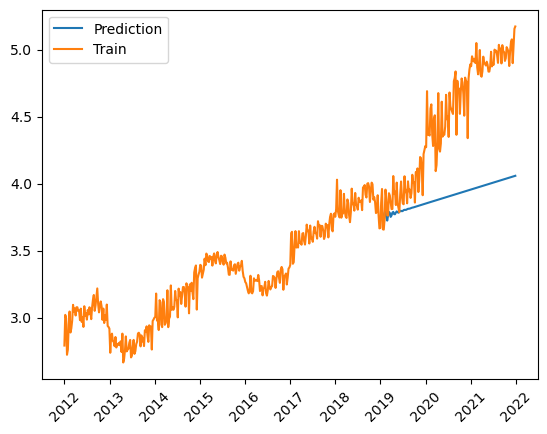

In [253]:
plt.xticks(rotation=45)
plt.plot(aapl_pred,label='Prediction')
plt.plot(aapl_train,label="Train")
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1080.740, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1140.827, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1292.312, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1081.209, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1295.678, Time=1.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1294.661, Time=0.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1314.717, Time=2.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1348.728, Time=3.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1392.634, Time=4.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1369.954, Time=2.60 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1493.576, Time=4.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1492.547, Time=2.53 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-1471.872, Time=2.08 sec

Best model:  ARIMA(3,1,3

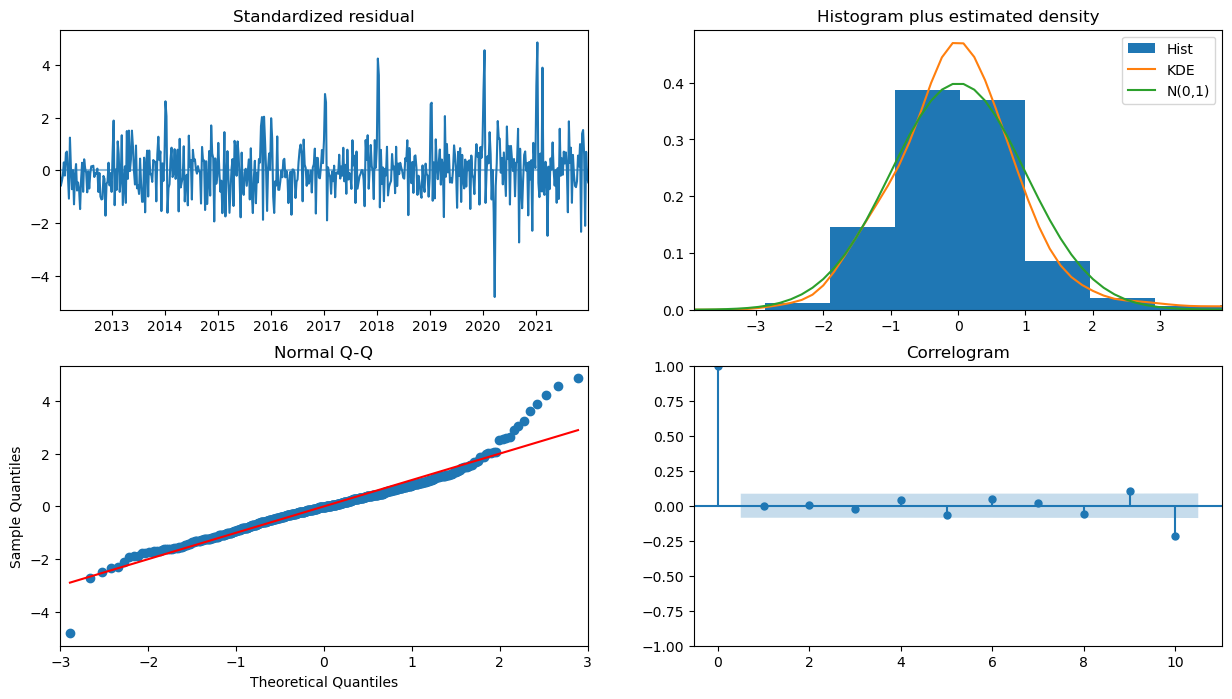

In [248]:
model_autoARIMA = auto_arima(msft_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [266]:
msft_model = ARIMA(msft_train, order=(3,2,3),freq='W-MON')
msft_fitted = msft_model.fit()  
print(msft_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  522
Model:                 ARIMA(3, 2, 3)   Log Likelihood                 745.565
Date:                Mon, 24 Apr 2023   AIC                          -1477.131
Time:                        08:23:17   BIC                          -1447.354
Sample:                    01-02-2012   HQIC                         -1465.466
                         - 12-27-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5506      0.048    -11.379      0.000      -0.645      -0.456
ar.L2         -0.6564      0.040    -16.340      0.000      -0.735      -0.578
ar.L3         -0.6739      0.035    -19.456      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [267]:
msft_pred=msft_fitted.predict('2019','2021',dynamic=True,typ='levels')
print(msft_pred)

Date
2019-01-07    4.634827
2019-01-14    4.669134
2019-01-21    4.642335
2019-01-28    4.630448
2019-02-04    4.641123
                ...   
2021-11-29    5.143267
2021-12-06    5.146620
2021-12-13    5.149973
2021-12-20    5.153325
2021-12-27    5.156678
Freq: W-MON, Name: predicted_mean, Length: 156, dtype: float64


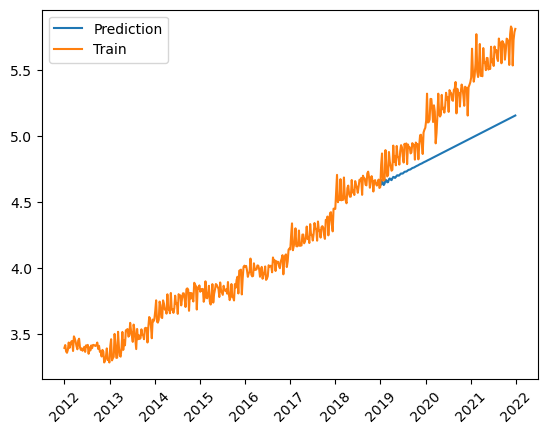

In [268]:
plt.xticks(rotation=45)
plt.plot(msft_pred,label='Prediction')
plt.plot(msft_train,label="Train")
plt.legend()